# Bài thực hành số 2

Chào mừng đến với bài thực hành số 2, trong bài thực hành này ta sẽ học về thuật toán nhận diện cạnh Canny, các bước xử lí và áp dụng Canny vào ảnh, video thực tế.

## Tổng quan
Có thể bạn chưa biết, khi nói đến nhận diện hình ảnh, mắt người chỉ mất vài phần nghìn giây để xử lý và xác định nội dung của một bức ảnh. Khả năng đáng kinh ngạc này có thể được thực hiện dù dữ liệu là tranh vẽ hay ảnh chụp. Đây cũng là mục đích hướng tới của thị giác máy tính. Một trong những ý tưởng ngày nay là xây dựng một thuật toán có thể phác thảo các cạnh của bất kỳ đối tượng nào có trên một hình ảnh, sử dụng thuật toán phát hiện cạnh Canny (Canny edge detection)

Trước hết, cần hiểu thuật toán phát hiện cạnh Canny là gì:

Phát hiện cạnh Canny (Canny edge detector) là một thuật toán bao gồm nhiều giai đoạn để phát hiện một loạt các cạnh trong hình ảnh. Nó được phát triển bởi John F. Canny vào năm 1986. Canny cũng đưa ra một lý thuyết tính toán về phát hiện cạnh giải thích tại sao kỹ thuật này hoạt động.

## Mục tiêu học tập
Sau khi hoàn thành bài thực hành này, học viên sẽ học được các kiến thức:
  - Hiểu rõ hơn về thuật toán Canny
  - Cách lập trình các bước xử lí trong thuật toán Canny để phát hiện cạnh

## Những kiến thức liên quan
  - Python
  - Xử lí ảnh
  - OpenCV

## Nền tảng cần thiết
Để thực hiện được bài thực hành, bạn sẽ cần có những kiến thức sau:
  - Kĩ năng lập trình cơ bản với Python

## Bài toán
**Mục tiêu**: Xác định các cạnh trong hình ảnh/video đầu vào bằng thuật toán Canny.
**Yêu cầu**
- Input: Ảnh hoặc video.
- Output: Ảnh hoặc video được xử lí bằng Canny.

## Hướng dẫn

Dưới đây là hướng dẫn chi tiết các bước để bạn có thể lập trình và áp dụng Canny vào thực tế.


### Thư viện



In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Đọc ảnh

**Hàm `cv2.imread()`** có tác dụng đọc file ảnh/video đầu vào.

**Hàm `cv2_imshow()`** hiện thị hình ảnh lên cửa sổ giao diện.

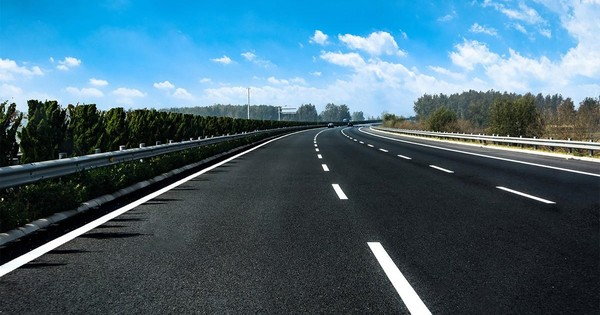

In [ ]:
image_path = [...]
# Đọc ảnh và trả về một ma trận 3 chiều ứng với các kênh màu B,G,R
img = cv2.imread(image_path)
# Hiển thị ảnh lên cửa sổ giao diện
cv2_imshow(img)

### Làm mờ ảnh (Gaussian Blur)

#### Lý thuyết
Việc loại bỏ các yếu tố nhiễu là rất quan trọng với quá trình phát hiện cạnh. Một cách hữu dụng đó là áp dụng bộ lọc Gaussian. Để làm như vậy, kỹ thuật tích chập hình ảnh được áp dụng với Gaussian Kernel (kích thước 3×3, 5×5, 7×7, v.v.). Kích thước kernel phụ thuộc vào hiệu ứng làm mờ mong muốn. Về cơ bản, kernel càng nhỏ, hiệu ứng mờ càng ít.

Phương trình cho một kernel bộ lọc Gaussian có kích thước (2k + 1) × (2k + 1)

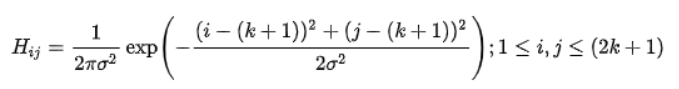

#### Thực hành

Hàm `cv2.GaussianBlur` áp dụng bộ lọc Gaussian để làm mờ hình ảnh, giúp giảm nhiễu và làm mịn các cạnh.

Hàm sẽ bao gồm 3 tham số:

- `image`: Hình ảnh đầu vào cần được làm mờ.
- `kernel_size`: Kích thước của kernel (nhân) được sử dụng để làm mờ ảnh. Kernel là một ma trận vuông với chiều dài cạnh là kernel_size. Kích thước này phải là số lẻ và lớn hơn 1, ví dụ: (3, 3), (5, 5),...
- `sigma`: Độ lệch chuẩn của Gaussian, xác định mức độ mờ của ảnh. Nếu sigma là 0, nó sẽ được tính toán tự động từ kích thước kernel.


**Bài tập 1:** Hoàn thành đoạn code sau bằng việc điền vào [...].

Hãy thử chọn và áp dụng bộ lọc Gaussian với các thông số khác nhau để nhận thấy tác động của từng tham số.

In [ ]:
def gaussian_blur(image, kernel_size=[...], sigma=[...]):
    return cv2.GaussianBlur([...], ([...], [...]), [...])

In [ ]:
# Load image and convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_image = gaussian_blur(gray_image)

#### Kết quả

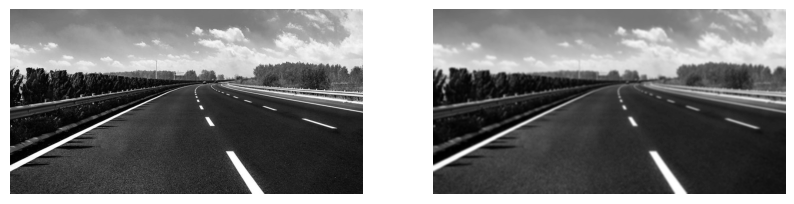

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(gray_image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(blurred_image, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Tính Gradient (Gradient Calculation)


#### Lý thuyết

Tính gradient của ảnh để xác định sự thay đổi cường độ tại mỗi điểm trong ảnh để xác định cạnh. Để thực hiện dễ dàng nhất, chúng ta sẽ sử dụng bộ lọc Sobel để làm nổi bật sự thay đổi cường độ thông qua cả hai trục ngang (x) và dọc (y).

Sau khi ảnh được làm mịn, chúng ta sẽ tính các đạo hàm lx và ly. Qua đó sẽ xác định được cường độ và hướng của gradient.

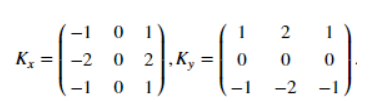

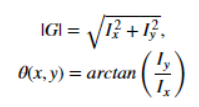

<!-- Sau khi áp dụng các bước trên, chúng ta thu được hình ảnh như sau:

--- Ảnh kết quả mẫu

Có thể thấy, hình ảnh thu được khá hoàn hảo. Tuy nhiên chúng ta còn 2 vấn đề là không đồng nhất giữa độ dày và độ sáng các cạnh. -->

#### Thực hành

Tính gradient của ảnh để xác định sự thay đổi cường độ tại mỗi điểm trong ảnh. Hàm này sẽ gồm 2 bước xử lí:

1. Tính toán đạo hàm bậc nhất của ảnh:
  - Hàm `cv2.Sobel` tính toán đạo hàm bậc nhất của hình ảnh bằng cách sử dụng bộ lọc Sobel, cho phép phát hiện các cạnh trong hình ảnh.
  - Hàm sẽ gồm 5 tham số:
    - `image`: Hình ảnh đầu vào.
    - Kiểu dữ liệu của ảnh đầu ra, thường sử dụng CV_64F để có độ chính xác cao hơn vì gradient có thể là số âm.
    - Các tham số này xác định hướng của đạo hàm. 1, 0 tính đạo hàm theo trục x, còn 0, 1 tính đạo hàm theo trục y.
    - `ksize`: Kích thước của kernel Sobel. Thường là số lẻ như 3, 5, 7,...

2. Tính độ lớn và hướng của gradient

Hàm này sử dụng hàm `np.hypot` và `np.arctan2` với đầu vào là kết quả từ các bộ lọc Sobel để tính toán độ lớn và hướng của gradient, cung cấp thông tin về cách các pixel thay đổi trong hình ảnh.



**Bài tập 2:** Hoàn thành đoạn code sau bằng việc điền vào [...].

In [ ]:
def gradient(image):
    sobelx = cv2.Sobel([...], [...], [...], [...], ksize=[...])
    sobely = cv2.Sobel([...], [...], [...], [...], ksize=[...])
    gradient_magnitude = np.hypot([...], [...])
    gradient_direction = np.arctan2([...], [...])
    return gradient_magnitude, gradient_direction

In [ ]:
gradient_magnitude, gradient_direction = gradient(blurred_image)

#### Kết quả

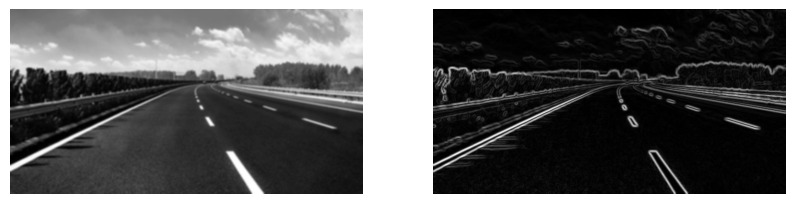

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(blurred_image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(gradient_magnitude, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Không cực đại hóa (Non-maximum Suppression)


#### Lý thuyết

Để cho ra kết quả tốt nhất, hình ảnh cuối cùng nên chỉ có các điểm cực đại cục bộ trong gradient magnitude được giữ lại.

Nguyên tắc: thuật toán đi qua tất cả các điểm trên ma trận cường độ gradient và tìm các pixel có giá trị lớn nhất theo hướng các cạnh.

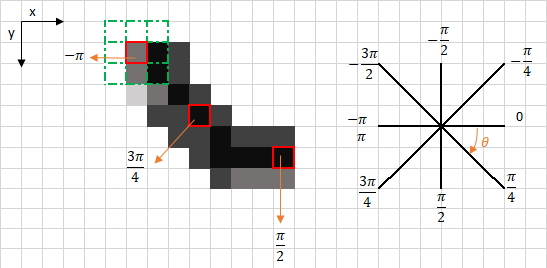--- ví dụ non max

Hộp màu đỏ ở góc trên bên trái đại diện cho một pixel cường độ của ma trận Cường độ Gradient đang được xử lý. Hướng gradient tương ứng được biểu diễn bằng mũi tên màu cam với góc -pi radian (+/- 180 độ).

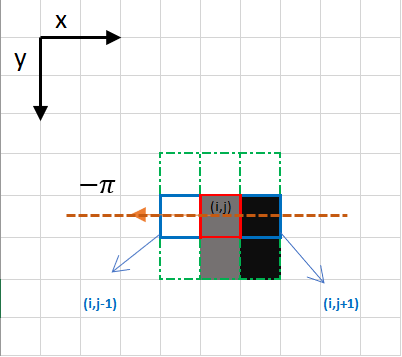

Hướng gradient là đường chấm màu cam (nằm ngang từ trái sang phải). Mục đích của thuật toán là để kiểm tra xem các pixel trên cùng một hướng có cường độ cao hơn hay thấp hơn các pixel đang được xử lý. Trong ví dụ trên, pixel (i, j) đang được xử lý và các pixel trên cùng một hướng được đánh dấu bằng màu xanh lam (i, j-1) và (i, j + 1). Nếu một trong hai pixel đó có cường độ cao hơn pixel đang được xử lý, thì chỉ có một pixel có cường độ cao hơn được giữ lại. Pixel (i, j-1) có vẻ sáng hơn, vì nó có màu trắng (giá trị 255). Do đó, giá trị cường độ của pixel hiện tại (i, j) được đặt thành 0. Nếu không có pixel nào ở hướng cạnh có giá trị cường độ cao hơn thì giá trị của pixel hiện tại được giữ nguyên.

<!-- --- Kết quả thuật toán

Kết quả trả về là một hình ảnh với các cạnh mỏng hơn. Tuy nhiên vẫn còn sự không đồng đều giữa các cạnh. Việc này sẽ được khắc phục ở 2 bước cuối. -->

#### Thực hành

Tóm gọn lại, mỗi pixel được đánh giá bằng 2 tiêu chí chính (hướng cạnh tính bằng radian và cường độ pixel (từ 0–255). Dựa trên các đầu vào này, các bước non-maximum suppression là:

- Tạo một ma trận được khởi tạo bằng 0 có cùng kích thước của ma trận cường độ gradient ban đầu;
- Xác định hướng của gradient dựa trên giá trị góc từ ma trận góc;
- Kiểm tra xem pixel ở cùng một hướng có cường độ cao hơn pixel hiện đang được xử lý hay không;
- Trả lại hình ảnh được xử lý bằng thuật toán non-maximum suppression.

**Bài tập 3:** Hoàn thành đoạn code sau.

In [ ]:
def non_maximum_suppression(gradient_magnitude, gradient_direction):
    M, N = gradient_magnitude.shape
    Z = np.zeros((M, N), dtype=np.float32)
    angle = gradient_direction * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255

                ### Your code starts here ###
                # Angle 0

                # Angle 45

                # Angle 90

                # Angle 135

                ### Your code ends here ###

                if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r):
                    Z[i, j] = gradient_magnitude[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass

    return Z

In [ ]:
nms_image = non_maximum_suppression(gradient_magnitude, gradient_direction)

#### Kết quả

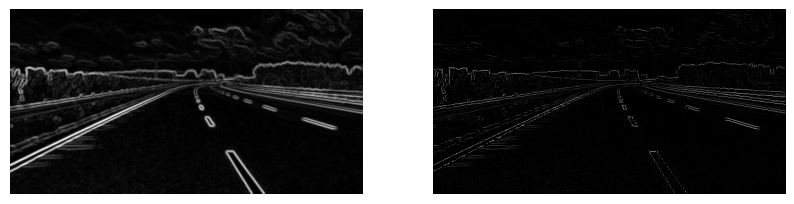

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(gradient_magnitude, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(nms_image, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Ngưỡng hóa kép (Double Threshold)


#### Lý thuyết

Bước này phân chia các pixel thành ba loại: mạnh, yếu và không phải cạnh.

Áp dụng hai ngưỡng: ngưỡng cao và ngưỡng thấp.
- Pixel có giá trị lớn hơn ngưỡng cao được coi là cạnh mạnh.
- Pixel có giá trị giữa ngưỡng cao và ngưỡng thấp được coi là cạnh yếu.
- Pixel có giá trị dưới ngưỡng thấp bị loại bỏ.

<!-- --- Ảnh kết quả -->

#### Thực hành

**Bài tập 4:** Hoàn thành đoạn code sau bằng việc điền vào [...].

Việc lựa chọn threshold ảnh hưởng trực tiếp tới kết quả đầu ra vì nó là cơ sở để xác định pixel nào là cạnh. Hãy thử nghiệm các giá trị khác nhau để tìm ra cặp tham số phù hợp với ảnh đầu vào.

In [ ]:
def double_threshold(image, low_threshold, high_threshold):
    strong = [...]
    weak = [...]
    strong_i, strong_j = np.where([...])
    weak_i, weak_j = np.where([...])

    result = np.zeros_like(image)
    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak

    return result

In [ ]:
low_threshold = [...]
high_threshold = [...]
thresholded_image = double_threshold(nms_image, low_threshold, high_threshold)

cv2_imshow(thresholded_image)

#### Kết quả

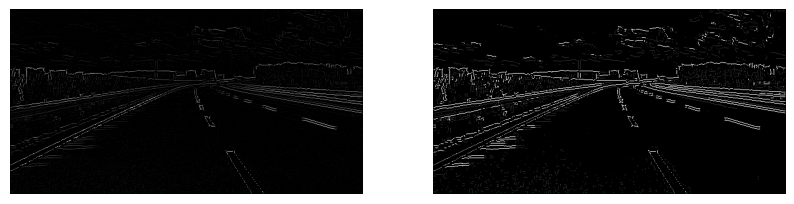

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(nms_image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(thresholded_image, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Liên kết cạnh (Edge Tracking by Hysteresis)


#### Lý thuyết

Mục tiêu của bước này là xác định các cạnh yếu có kết nối với các cạnh mạnh.

- Các cạnh yếu kết nối với các cạnh mạnh được coi là cạnh thật sự.
- Sử dụng duyệt theo chiều sâu (depth-first search) hoặc duyệt theo chiều rộng (breadth-first search) để kết nối các cạnh.

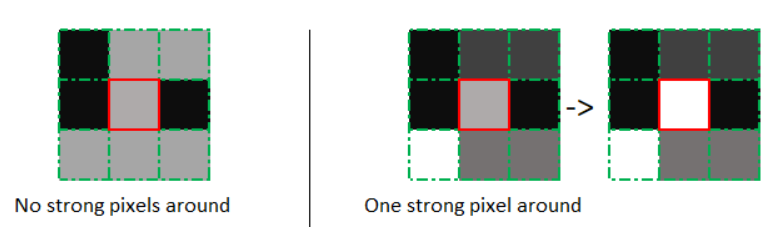

#### Thực hành

**Bài tập 5:** Hoàn thành đoạn code sau bằng việc hoàn thành đoạn code sau.

In [ ]:
def edge_tracking(image, weak=50, strong=255):
    M, N = image.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            ### Your code starts here ###

            ### Your code ends here ###
    return image

In [ ]:
final_image = edge_tracking(thresholded_image)

#### Kết quả

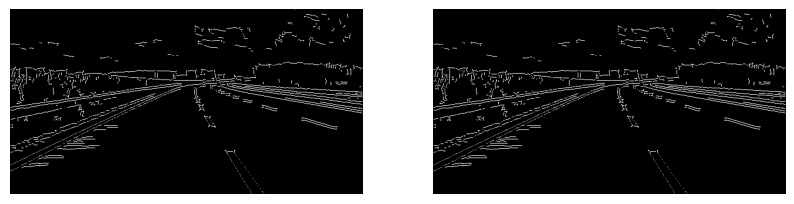

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(thresholded_image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(final_image, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Kết hợp tất cả các bước



#### Thực hành

Dưới đây là cách kết hợp tất cả các bước thành một hàm duy nhất để áp dụng thuật toán Canny.

**Bài tập 6:** Hoàn thành đoạn code sau bằng việc điền vào [...].

In [ ]:
def canny_edge_detection(image, low_threshold_ratio=[...], high_threshold_ratio=[...], sigma=[...]):

    # Làm mờ ảnh bằng cách áp dụng bộ lọc Gaussian
    blurred_image = [...]

    # Tính Gradient
    gradient_magnitude, gradient_direction = [...]

    # Không cực đại hóa
    nms_image = [...]

    # Chọn threshold
    low_threshold = [...]
    high_threshold = [...]

    # Nhận diện cạnh
    thresholded_image = [...]
    final_image = [...]
    return final_image

In [ ]:
# Load image and convert to grayscale
image = cv2.imread('/road_2.jpg', cv2.IMREAD_GRAYSCALE)
edges = canny_edge_detection(image)

#### Kết quả

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(edges, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Sử dụng hàm có sẵn trong thư viện OpenCV



#### Lý thuyết

Trong thư viện OpenCV, họ đã cung cấp sẵn cho ta **hàm `cv2.Canny()`**. Để sử dụng hàm này, ta cần truyền cho nó 3 biến:

- img: ảnh đầu vào (ảnh xám)
- threshold1: Ngưỡng dưới cho ngưỡng hóa kép.
- threshold2: Ngưỡng trên cho ngưỡng hóa kép.

#### Thực hành

**Bài tập 7:** Hoàn thành đoạn code sau bằng việc điền vào [...].

Hãy thử chọn và áp dụng các mức threshold khác nhau để nhận thấy tác động của từng tham số.

In [ ]:
# Load image and convert to grayscale
image = cv2.imread([...])
canny_img = cv2.Canny([...])

#### Kết quả

In [ ]:
# Tạo một figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Hiển thị ảnh đầu tiên
axs[0].imshow(image, cmap='gray')
axs[0].axis('off')  # Tắt hiển thị trục

# Hiển thị ảnh thứ hai
axs[1].imshow(canny_img, cmap='gray')
axs[1].axis('off')  # Tắt hiển thị trục

# Hiển thị figure
plt.show()

### Áp dụng Canny vào video


#### Lý thuyết

Chúng ta sẽ đi qua lần lượt các bước như sau:
- Đọc video:
  - `cv2.VideoCapture()`: Mở video đầu vào.

- Lấy thông tin video:
  - frame_width, frame_height, fps: Lấy kích thước khung hình và số khung hình trên giây (fps) của video đầu vào.
  - fourcc: Định dạng codec cho video đầu ra.

- Tạo VideoWriter:
  - `cv2.VideoWriter()`: Tạo đối tượng để ghi video đầu ra.

- Vòng lặp xử lý từng khung hình:
  - `cv2.cvtColor()`: Chuyển đổi khung hình sang ảnh xám.
  - Đưa từng frame qua thuật toán Canny theo 2 cách do bạn tự chọn. 1 là dùng hàm mình vừa tạo bên trên (`canny_edge_detection()`). 2 là sử dụng hàm có sẵn trong thư viện OpenCV (`cv2.Canny()`).

- Giải phóng tài nguyên:
  - `cap.release()`, `out.release()`, `cv2.destroyAllWindows()`: Đóng các tài nguyên.

#### Thực hành

**Bài tập 8:** Hoàn thành đoạn code sau bằng việc điền vào [...].

Bằng những kiến thức và chu trình xử lý được cung cấp, bạn hãy hoàn thành vòng lặp xử lí từng khung hình cho video.

In [ ]:
# Đường dẫn đến video đầu vào và video đầu ra
input_video_path = [...]
output_video_path = 'output_video_canny.mp4'

# Mở video đầu vào
cap = cv2.VideoCapture(input_video_path)

# Lấy thông tin về định dạng của video đầu vào
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Tạo đối tượng VideoWriter để ghi video đầu ra
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height), isColor=False)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Chuyển đổi khung hình sang ảnh xám
    gray_frame = [...]

    # Cách 1: Áp dụng bộ lọc Canny edge detection tự code
    # edges = [...]

    # Cách 2: Áp dụng bộ lọc Canny edge detection có sẵn trong thư viện
    edges = [...]

    # Ghi khung hình đã xử lý vào video đầu ra
    out.write(edges)

# Giải phóng các tài nguyên
cap.release()
out.release()
cv2.destroyAllWindows()
